# Microsoft study case - Prevare u online kupovini

In [1]:
import pandas as pd
import numpy as np
from datetime import time
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


%matplotlib inline

data = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
zemlje = pd.read_csv('Data/countries.csv')

In [2]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,309557,2015-01-01 00:00:43,2015-01-01 00:00:44,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
1,124539,2015-01-01 00:00:44,2015-01-01 00:00:45,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
2,161246,2015-01-01 00:00:45,2015-01-01 00:00:46,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
3,356414,2015-01-01 00:00:46,2015-01-01 00:00:47,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of
4,338656,2015-01-01 00:00:47,2015-01-01 00:00:48,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105778 entries, 0 to 105777
Data columns (total 12 columns):
user_id           105778 non-null int64
signup_time       105778 non-null object
purchase_time     105778 non-null object
purchase_value    105778 non-null int64
device_id         105778 non-null object
source            105778 non-null object
browser           105778 non-null object
sex               105778 non-null object
age               105778 non-null int64
ip_address        105778 non-null float64
class             105778 non-null int64
country           90440 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 9.7+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45334 entries, 0 to 45333
Data columns (total 12 columns):
user_id           45334 non-null int64
signup_time       45334 non-null object
purchase_time     45334 non-null object
purchase_value    45334 non-null int64
device_id         45334 non-null object
source            45334 non-null object
browser           45334 non-null object
sex               45334 non-null object
age               45334 non-null int64
ip_address        45334 non-null float64
class             45334 non-null int64
country           38706 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 4.2+ MB


### U trening i test setu ima NaN celija, da ih prebrojimo i vidimo o kojim vrednostima se radi

In [5]:
print('Train columns with null values:\n', data.isnull().sum())
print("-"*10)
print('Test/Validation columns with null values:\n', test.isnull().sum())
print("-"*10)

Train columns with null values:
 user_id               0
signup_time           0
purchase_time         0
purchase_value        0
device_id             0
source                0
browser               0
sex                   0
age                   0
ip_address            0
class                 0
country           15338
dtype: int64
----------
Test/Validation columns with null values:
 user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex                  0
age                  0
ip_address           0
class                0
country           6628
dtype: int64
----------


In [6]:
data[data.isnull().any(axis=1)].head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
80,24838,2015-01-01 03:58:56,2015-01-01 03:58:57,16,NLTRLNOXWUCCW,Ads,Safari,M,27,3.988529e+09,1,NaN
81,242755,2015-01-01 03:58:57,2015-01-01 03:58:58,16,NLTRLNOXWUCCW,Ads,Safari,M,27,3.988529e+09,1,NaN
82,302603,2015-01-01 03:58:58,2015-01-01 03:58:59,16,NLTRLNOXWUCCW,Ads,Safari,M,27,3.988529e+09,1,NaN
83,391415,2015-01-01 03:58:59,2015-01-01 03:59:00,16,NLTRLNOXWUCCW,Ads,Safari,M,27,3.988529e+09,1,NaN
84,289545,2015-01-01 03:59:00,2015-01-01 03:59:01,16,NLTRLNOXWUCCW,Ads,Safari,M,27,3.988529e+09,1,NaN


### Moguce da nepoznata zemlja na neki nacin utice na rezultat pa uvodimo kategoriju zemlje 'Unknown'

In [7]:
data = data.fillna({"country": "Unknown"})

Kolone **signup_time** i **purchase_time** cemo ubaciti u jednu koja definise vreme trajanja transakcije u satima

In [8]:
data['Dt'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).astype('timedelta64[h]')

In [9]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Dt
0,309557,2015-01-01 00:00:43,2015-01-01 00:00:44,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of,0.0
1,124539,2015-01-01 00:00:44,2015-01-01 00:00:45,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of,0.0
2,161246,2015-01-01 00:00:45,2015-01-01 00:00:46,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of,0.0
3,356414,2015-01-01 00:00:46,2015-01-01 00:00:47,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of,0.0
4,338656,2015-01-01 00:00:47,2015-01-01 00:00:48,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of,0.0


In [10]:
data['signup_time'] = pd.to_datetime(data['signup_time'])

In [11]:
data.head(3)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Dt
0,309557,2015-01-01 00:00:43,2015-01-01 00:00:44,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of,0.0
1,124539,2015-01-01 00:00:44,2015-01-01 00:00:45,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of,0.0
2,161246,2015-01-01 00:00:45,2015-01-01 00:00:46,14,BBPACGBUVJUXF,Ads,Chrome,F,38,2.001426e+09,1,Korea Republic of,0.0


In [12]:
print('Procenat ispravnih:\n', len(data[data['class']==0])/len(data)*100, ' %')
print('Procenat fraud:\n', len(data[data['class']==1])/len(data)*100, ' %')

Procenat ispravnih:
 88.58269205316796  %
Procenat fraud:
 11.417307946832045  %


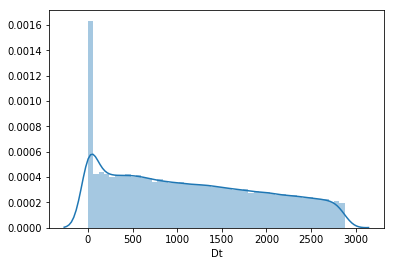

In [13]:
sns.distplot(data['Dt'])

In [14]:
test['Dt'] = (pd.to_datetime(test['purchase_time']) - pd.to_datetime(test['signup_time'])).astype('timedelta64[h]')

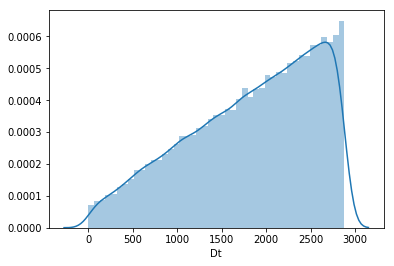

In [15]:
sns.distplot(test['Dt'])

### U test podacima postoji samo jedno Dt=0.0. Ovo su neki cudni podaci u uzorku za ucenje, postoje samo na pocetku i posle ih vise nema, izbacujemo ove vrednosti pa gledamo da li se promenila korelacija

In [16]:
data_n = data.drop((data[data['Dt'] == 0.0]).index,0)

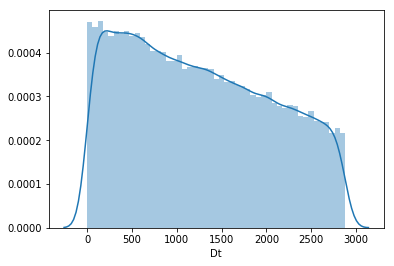

In [17]:
sns.distplot(data_n['Dt'])

### Da! Prevare jesu bile u ogromnom procentu za Dt=0.0, ali  ovih slucajeva nema u test setu, kad smo ih izbacili korelacija vise ne postoji, ne postoji vise ni ona mala kod 'age'

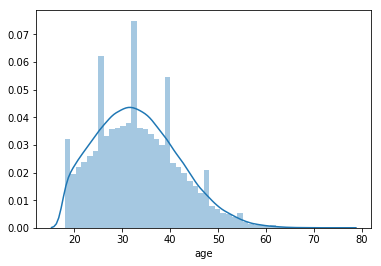

In [18]:
sns.distplot(data_n['age'])

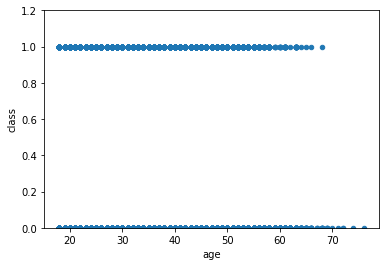

In [19]:
#scatter plot GrLivArea vs SalePrice
var = 'GrLivArea'
data.plot.scatter(x='age', y='class', ylim=(0,1.2))

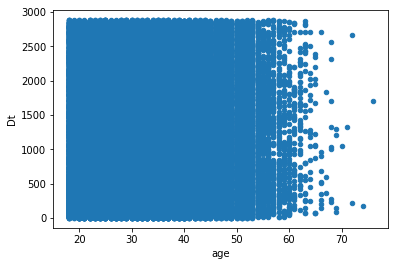

In [20]:
var = 'Vreme'
data_n.plot.scatter(x='age', y='Dt')

### Okrecemo se zemljama, prebacujemo svaku zemlju u broj na osnovu fajla countries.csv pa da vidimo ima li neke korelacije

In [21]:
zemlje = pd.read_csv('Data/countries.csv')

In [22]:
zemlje.head()

,country
0,Unknown
1,Japan
2,United States
3,Canada
4,China


In [23]:
my_dict = {}
count = -1
f =  open("Data/countries.csv", 'r')
for line in f:
    if count>-1:
        key, values = line.rstrip(), count
        my_dict[key] = values
    count = count + 1

In [24]:
my_dict

{'Afghanistan': 160,
 'Albania': 86,
 'Algeria': 68,
 'Angola': 129,
 'Antigua and Barbuda': 156,
 'Argentina': 7,
 'Armenia': 118,
 'Australia': 33,
 'Austria': 35,
 'Azerbaijan': 125,
 'Bahamas': 168,
 'Bahrain': 124,
 'Bangladesh': 16,
 'Barbados': 93,
 'Belarus': 115,
 'Belgium': 20,
 'Belize': 107,
 'Benin': 173,
 'Bermuda': 162,
 'Bhutan': 161,
 'Bolivia': 62,
 'Bonaire; Sint Eustatius; Saba': 170,
 'Bosnia and Herzegowina': 112,
 'Botswana': 143,
 'Brazil': 5,
 'British Indian Ocean Territory': 167,
 'Brunei Darussalam': 139,
 'Bulgaria': 63,
 'Burkina Faso': 145,
 'Burundi': 179,
 'Cambodia': 106,
 'Cameroon': 135,
 'Canada': 3,
 'Cape Verde': 174,
 'Cayman Islands': 154,
 'Chile': 44,
 'China': 4,
 'Colombia': 49,
 'Congo': 128,
 'Congo The Democratic Republic of The': 153,
 'Costa Rica': 83,
 "Cote D'ivoire": 116,
 'Croatia (LOCAL Name: Hrvatska)': 65,
 'Cuba': 84,
 'Curacao': 163,
 'Cyprus': 66,
 'Czech Republic': 67,
 'Denmark': 21,
 'Djibouti': 117,
 'Dominica': 144,
 'Dom

In [25]:
cleanup_nums = {"country": my_dict}
data_n.replace(cleanup_nums, inplace=True)

In [26]:
data_n.head(4)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Dt
378,58397,2015-01-01 03:04:18,2015-01-01 15:26:23,37,YICCDRLMZHPSM,Ads,Safari,M,30,3.686620e+09,0,1,12.0
713,326217,2015-01-01 13:53:34,2015-01-02 04:45:11,11,KBEAMBIXFHTQG,Direct,FireFox,F,29,2.068289e+09,0,4,14.0
795,356114,2015-01-01 08:57:35,2015-01-02 08:15:12,36,VWFJUWSKZFWXK,SEO,Chrome,M,46,4.121968e+09,0,0,23.0
846,64429,2015-01-01 13:04:16,2015-01-02 09:31:49,54,IAZPLBXKSKOGW,SEO,Chrome,M,25,3.328207e+09,0,3,20.0


In [27]:
data_n["country"] = data_n["country"].astype('int64')
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98138 entries, 378 to 105777
Data columns (total 13 columns):
user_id           98138 non-null int64
signup_time       98138 non-null datetime64[ns]
purchase_time     98138 non-null object
purchase_value    98138 non-null int64
device_id         98138 non-null object
source            98138 non-null object
browser           98138 non-null object
sex               98138 non-null object
age               98138 non-null int64
ip_address        98138 non-null float64
class             98138 non-null int64
country           98138 non-null int64
Dt                98138 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 10.5+ MB


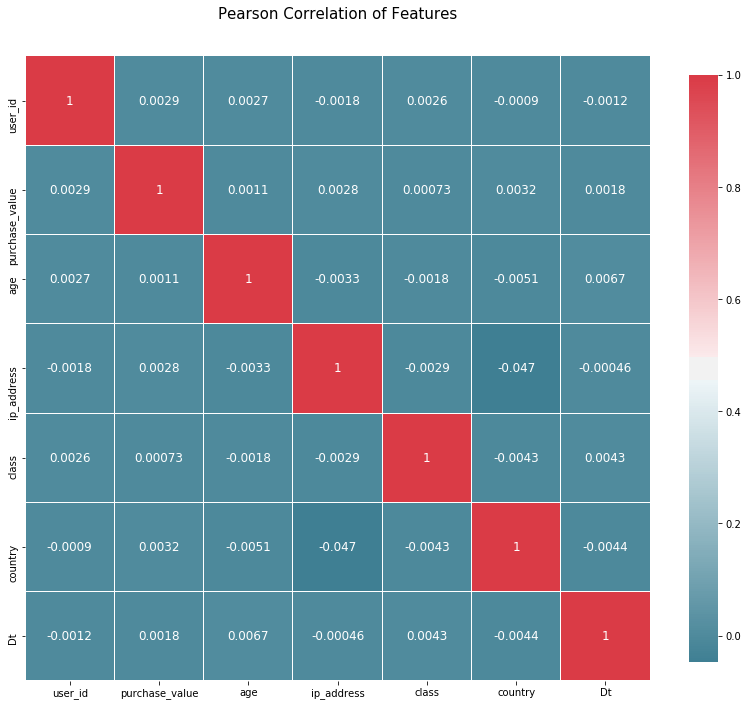

In [28]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_n)


In [29]:
data_n['source'].value_counts()

SEO       39488
Ads       38854
Direct    19796
Name: source, dtype: int64

In [30]:
data_n['browser'].value_counts()

Chrome     39699
IE         24022
Safari     16061
FireFox    15946
Opera       2410
Name: browser, dtype: int64

In [31]:
source_dict = {'SEO' : '0','Ads' : '1', 'Direct' : '2'}

In [32]:
browser_dict = {'Chrome' : '0','IE' : '1', 'Safari' : '2', 'FireFox' : '3', 'Opera': '4'}

In [33]:
cleanup_nums = {"source": source_dict}
data_n.replace(cleanup_nums, inplace=True)

In [34]:
cleanup_nums = {"browser": browser_dict}
data_n.replace(cleanup_nums, inplace=True)

In [35]:
data_n["source"] = data_n["source"].astype('int64')

In [36]:
data_n["browser"] = data_n["browser"].astype('int64')

In [37]:
sex_dict = {'M' : '0','F' : '1'}

In [38]:
cleanup_nums = {"sex": sex_dict}
data_n.replace(cleanup_nums, inplace=True)

In [39]:
data_n["sex"] = data_n["sex"].astype('int64')

In [40]:
data_n.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Dt
378,58397,2015-01-01 03:04:18,2015-01-01 15:26:23,37,YICCDRLMZHPSM,1,2,0,30,3.686620e+09,0,1,12.0
713,326217,2015-01-01 13:53:34,2015-01-02 04:45:11,11,KBEAMBIXFHTQG,2,3,1,29,2.068289e+09,0,4,14.0
795,356114,2015-01-01 08:57:35,2015-01-02 08:15:12,36,VWFJUWSKZFWXK,0,0,0,46,4.121968e+09,0,0,23.0
846,64429,2015-01-01 13:04:16,2015-01-02 09:31:49,54,IAZPLBXKSKOGW,0,0,0,25,3.328207e+09,0,3,20.0
847,266142,2015-01-01 02:56:50,2015-01-02 09:42:20,33,VXPGOPOAJWYGS,0,0,0,32,4.943509e+08,0,2,30.0


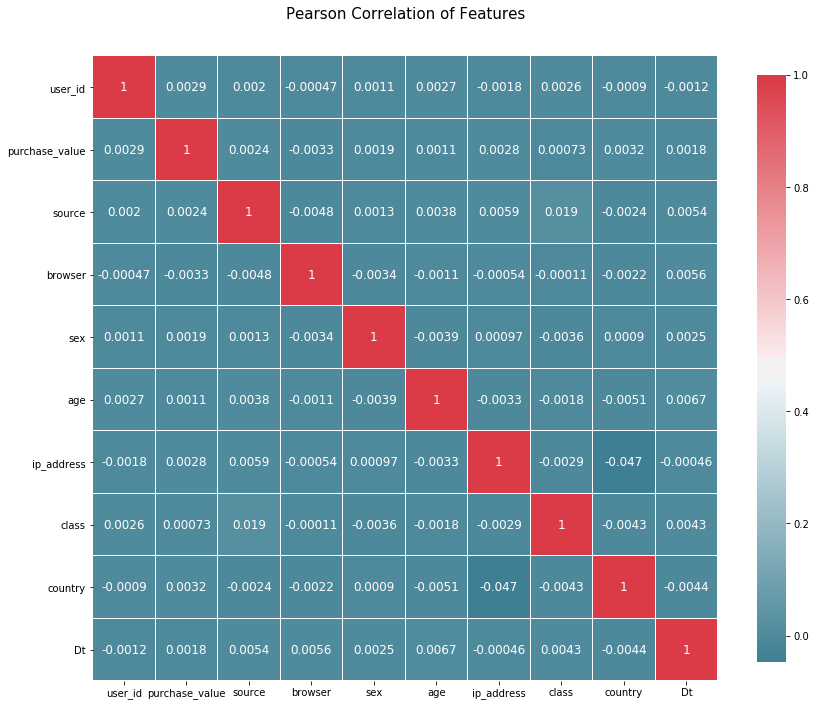

In [41]:
correlation_heatmap(data_n)

In [42]:
occur = data_n['device_id'].value_counts()

### Ideja: napraviti novu kolonu koja pokazuje koliko puta je korisnik vrsio kupovinu (prema device_id-u)

In [43]:
occur.head(5)

ZAPVZMOKPESVX    3
MIKFMVOJXZQXS    3
WNMTQULGSUCUB    3
ZTUETGYUPWOYV    3
QHNJXBTHZFQPT    3
Name: device_id, dtype: int64

In [44]:
data_n['occurence'] = 0

In [45]:
data_n.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Dt,occurence
378,58397,2015-01-01 03:04:18,2015-01-01 15:26:23,37,YICCDRLMZHPSM,1,2,0,30,3.686620e+09,0,1,12.0,0
713,326217,2015-01-01 13:53:34,2015-01-02 04:45:11,11,KBEAMBIXFHTQG,2,3,1,29,2.068289e+09,0,4,14.0,0
795,356114,2015-01-01 08:57:35,2015-01-02 08:15:12,36,VWFJUWSKZFWXK,0,0,0,46,4.121968e+09,0,0,23.0,0
846,64429,2015-01-01 13:04:16,2015-01-02 09:31:49,54,IAZPLBXKSKOGW,0,0,0,25,3.328207e+09,0,3,20.0,0
847,266142,2015-01-01 02:56:50,2015-01-02 09:42:20,33,VXPGOPOAJWYGS,0,0,0,32,4.943509e+08,0,2,30.0,0


In [46]:
data_n['occurence'] = data_n.apply(lambda row: occur[row['device_id']], axis=1)

In [47]:
len(data_n[data_n['occurence']==4])

0

In [48]:
data_n.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Dt,occurence
378,58397,2015-01-01 03:04:18,2015-01-01 15:26:23,37,YICCDRLMZHPSM,1,2,0,30,3.686620e+09,0,1,12.0,1
713,326217,2015-01-01 13:53:34,2015-01-02 04:45:11,11,KBEAMBIXFHTQG,2,3,1,29,2.068289e+09,0,4,14.0,1
795,356114,2015-01-01 08:57:35,2015-01-02 08:15:12,36,VWFJUWSKZFWXK,0,0,0,46,4.121968e+09,0,0,23.0,1
846,64429,2015-01-01 13:04:16,2015-01-02 09:31:49,54,IAZPLBXKSKOGW,0,0,0,25,3.328207e+09,0,3,20.0,1
847,266142,2015-01-01 02:56:50,2015-01-02 09:42:20,33,VXPGOPOAJWYGS,0,0,0,32,4.943509e+08,0,2,30.0,1


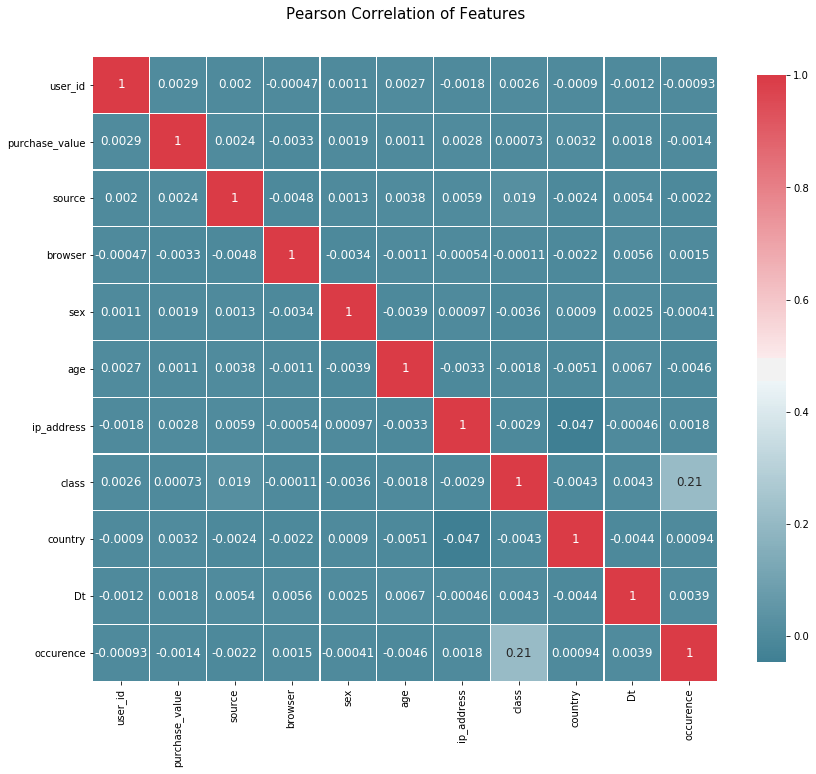

In [49]:
correlation_heatmap(data_n)

In [50]:
data_n['occurence'].value_counts()

1    92796
2     5228
3      114
Name: occurence, dtype: int64

In [51]:
data_n1 = data_n[data_n['occurence']==1]
print('occ 1: normal = ',len(data_n1[data_n1['class']==0])/len(data_n1)*100)
print('occ 1: fraud = ',len(data_n1[data_n1['class']==1])/len(data_n1)*100)

occ 1: normal =  96.49230570283201
occ 1: fraud =  3.507694297167981


In [52]:
data_n2 = data_n[data_n['occurence']==2]
print('occ 1: normal = ',len(data_n2[data_n2['class']==0])/len(data_n2)*100)
print('occ 1: fraud = ',len(data_n2[data_n2['class']==1])/len(data_n2)*100)

occ 1: normal =  77.12318286151492
occ 1: fraud =  22.87681713848508


In [53]:
data_n3 = data_n[data_n['occurence']==3]
print('occ 1: normal = ',len(data_n3[data_n3['class']==0])/len(data_n3)*100)
print('occ 1: fraud = ',len(data_n3[data_n3['class']==1])/len(data_n3)*100)

occ 1: normal =  80.7017543859649
occ 1: fraud =  19.298245614035086


### Slab zakljucak ali sta je tu je, ako je 'occurence'>1 veca verovatnoca za prevaru, oko 6X veci procenat prevare u slucajevima >1 u odnosu na samo jedno javljanje

class          0     1
occurence             
1          89541  3255
2           4032  1196
3             92    22


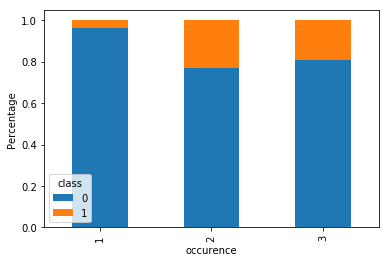

In [54]:
cab = pd.crosstab(data_n['occurence'], data_n['class'])
print(cab)
dummy = cab.div(cab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('occurence')
dummy = plt.ylabel('Percentage')

class        0     1
country             
0        13724   658
1         4518   213
2        36069  1757
3         1825    96
4         7462   356
5         1837    77
6          782    28
7          402    23
8         2703   142
9          535    24
10        2336   104
11         649    31
12         649    35
13        2549   115
14          51     5
15         145     5
16          29     2
17        1938    78
18         770    36
19         987    45
20         240    19
21         284    17
22        1059    42
23         247    15
24         689    26
25           5     0
26         143     7
27         296    18
28          23     2
29          13     0
...        ...   ...
147          8     0
148          9     0
149          2     0
150          3     0
151          2     0
153          1     0
154          3     0
155          1     0
156          2     0
158          1     0
159          5     0
160          3     0
161          1     0
162          1     0
163          

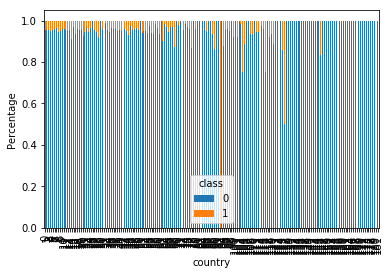

In [55]:
cab = pd.crosstab(data_n['country'], data_n['class'])
print(cab)
dummy = cab.div(cab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('country')
dummy = plt.ylabel('Percentage')

In [56]:
len(data_n[data_n['class']==1])/len(data_n)*100

4.557867492714341

In [57]:
X = data_n.iloc[:, data_n.columns == 'occurence']
y = data_n.iloc[:, data_n.columns == 'class']

In [58]:
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  68696
Number transactions test dataset:  29442
Total number of transactions:  98138


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.linear_model import LinearRegression

In [60]:
lr = LogisticRegression(penalty = 'l1')
lr.fit(X_train, y_train)

/home/marko/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
y_pred = lr.predict(X_test)

In [62]:
lr.score(X_test, y_test)

0.95401127640785277

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[28081,    23],
       [ 1331,     7]])

Recall metric in the testing dataset:  0.00523168908819


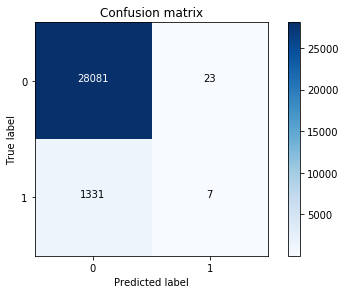

In [64]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [65]:
from sklearn import tree

In [66]:
clf = tree.tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

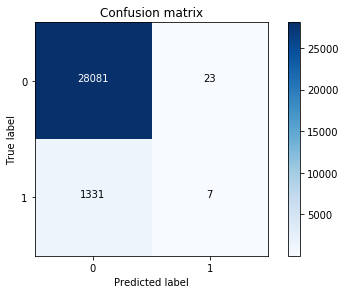

In [67]:
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()